模拟example 3.1中的确定信号

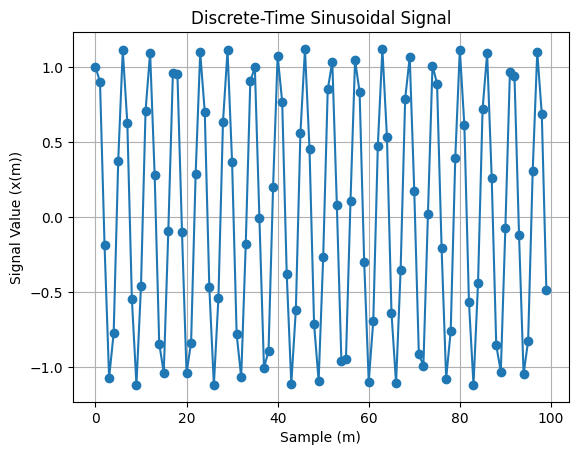

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(h1, P, num_samples):
    x = np.zeros(num_samples)
    x[0] = 1.0  # 初始值
    for m in range(1, num_samples):
        x[m] = h1(x[m-1], x[m-P])
    return x

def sinusoidal_model(x1, x2):
    a1 = 0.9  # 你可以根据需要更改a1的值来改变振荡频率
    return a1 * x1 - x2

# 设置参数
P = 2  # 过去的输出样本数
num_samples = 100  # 生成信号的总样本数

# 调用generate_signal函数来生成信号
signal = generate_signal(sinusoidal_model, P, num_samples)

# 绘制信号图形
plt.plot(signal, marker='o')
plt.xlabel('Sample (m)')
plt.ylabel('Signal Value (x(m))')
plt.title('Discrete-Time Sinusoidal Signal')
plt.grid(True)
plt.show()

Simulation of PRNG

In [3]:
def prng(seed, N, M, num_cycles):
    output = []
    for cycle in range(num_cycles):
        seed_squared = seed**2
        seed_str = str(seed_squared).zfill(2*N)  # 将结果补零到2N位数
        middle_digits = seed_str[N//2:N//2+N]
        new_seed = int(middle_digits)
        output.append(str(new_seed).zfill(M))  # 将输出补零到M位数
        seed = new_seed
    return output

seed = 1234
N = 4
M = 2
num_cycles = 10

output = prng(seed, N, M, num_cycles)
print(output)

['5227', '3215', '3362', '3030', '1809', '2724', '4201', '6484', '422', '1780']


模拟一维，二维高斯分布直方图

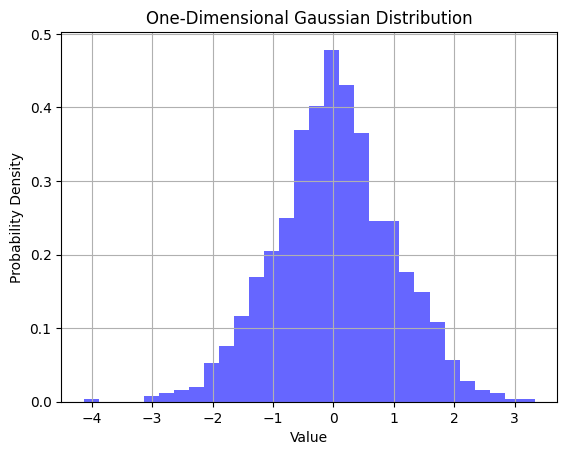

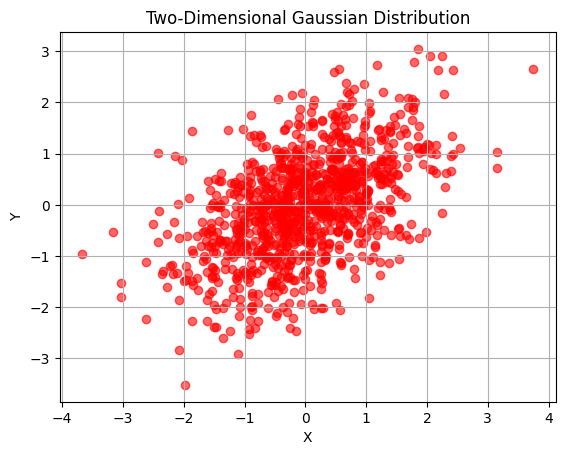

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定义均值和标准差
mean_1d = 0
std_1d = 1

# 生成一维高斯分布样本
samples_1d = np.random.normal(mean_1d, std_1d, 1000)

# 绘制直方图
plt.hist(samples_1d, bins=30, density=True, alpha=0.6, color='b')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('One-Dimensional Gaussian Distribution')
plt.grid(True)
plt.show()

# 定义均值和协方差矩阵
mean_2d = [0, 0]
cov_2d = [[1, 0.5], [0.5, 1]]

# 生成二维高斯分布样本
samples_2d = np.random.multivariate_normal(mean_2d, cov_2d, 1000)

# 绘制散点图
plt.scatter(samples_2d[:, 0], samples_2d[:, 1], alpha=0.6, color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two-Dimensional Gaussian Distribution')
plt.grid(True)
plt.show()

哈夫曼编码

In [11]:
import heapq
from collections import defaultdict

class HuffmanNode:
    def __init__(self, char=None, freq=0):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(freq_map):
    priority_queue = [HuffmanNode(char, freq) for char, freq in freq_map.items()]
    heapq.heapify(priority_queue)

    while len(priority_queue) > 1:
        left = heapq.heappop(priority_queue)
        right = heapq.heappop(priority_queue)
        combined_node = HuffmanNode(freq=left.freq + right.freq)
        combined_node.left = left
        combined_node.right = right
        heapq.heappush(priority_queue, combined_node)

    return priority_queue[0]

def build_huffman_codes(root, current_code="", huffman_codes={}):
    if root is None:
        return

    if root.char is not None:
        huffman_codes[root.char] = current_code
        return

    build_huffman_codes(root.left, current_code + "0", huffman_codes)
    build_huffman_codes(root.right, current_code + "1", huffman_codes)

def huffman_encoding(text):
    freq_map = defaultdict(int)
    for char in text:
        freq_map[char] += 1

    huffman_tree = build_huffman_tree(freq_map)
    huffman_codes = {}
    build_huffman_codes(huffman_tree, "", huffman_codes)

    encoded_text = "".join(huffman_codes[char] for char in text)
    return encoded_text, huffman_tree

def huffman_decoding(encoded_text, huffman_tree):
    current_node = huffman_tree
    decoded_text = ""

    for bit in encoded_text:
        if bit == "0":
            current_node = current_node.left
        else:
            current_node = current_node.right

        if current_node.char is not None:
            decoded_text += current_node.char
            current_node = huffman_tree

    return decoded_text

if __name__ == "__main__":
    text = "111233"
    encoded_text, huffman_tree = huffman_encoding(text)
    decoded_text = huffman_decoding(encoded_text, huffman_tree)

    print("Original text:", text)
    print("Encoded text:", encoded_text)
    print("Decoded text:", decoded_text)


Original text: 111233
Encoded text: 000101111
Decoded text: 111233


example 3.12

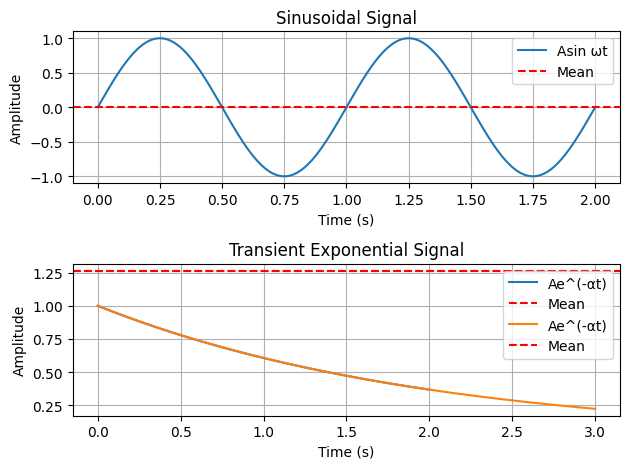

Mean of the sinusoidal signal: 5.551115123125783e-17
Power of the sinusoidal signal: 1.0
Mean of the transient signal: 1.2642412232215634
Power of the transient signal: 0.5465725265155069
Mean2 of the transient signal: 1.553739971612847
Power2 of the transient signal: 0.600649580738534


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sinusoidal signal parameters
A = 1.0  # Amplitude
omega = 2.0 * np.pi  # Angular frequency (rad/s)
T = 2.0 * np.pi / omega  # Period (s)

# Define the transient signal parameters
alpha = 0.5  # Decay rate (1/s)

# Define the time range for calculation
t = np.linspace(0, 2 * T, 1000)  # From 0 to 2 periods
t2 = np.linspace(0, 3 * T, 1000)

# Calculate the mean and power of the sinusoidal signal
mean_sin = np.trapz(A * np.sin(omega * t) / T, t)
power_sin = np.trapz(A**2 * np.sin(omega * t)**2 / T, t)

# Calculate the mean and power of the transient signal
mean_trans = np.trapz(A * np.exp(-alpha * t) / T, t)
power_trans = np.trapz(A**2 * np.exp(-2 * alpha * t) / (2 * alpha * T) * (1 - np.exp(-2 * alpha * T)), t)

mean_trans2 = np.trapz(A * np.exp(-alpha * t2) / T, t2)
power_trans2 = np.trapz(A**2 * np.exp(-2 * alpha * t2) / (2 * alpha * T) * (1 - np.exp(-2 * alpha * T)), t2)

# Plot the results
plt.subplot(2, 1, 1)
plt.plot(t, A * np.sin(omega * t), label="Asin ωt")
plt.axhline(mean_sin, color='r', linestyle='--', label='Mean')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.title('Sinusoidal Signal')

plt.subplot(2, 1, 2)
plt.plot(t, A * np.exp(-alpha * t), label="Ae^(-αt)")
plt.axhline(mean_trans, color='r', linestyle='--', label='Mean')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.title('Transient Exponential Signal')


plt.plot(t2, A * np.exp(-alpha * t2), label="Ae^(-αt)")
plt.axhline(mean_trans, color='r', linestyle='--', label='Mean')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.title('Transient Exponential Signal')

plt.tight_layout()
plt.show()

print("Mean of the sinusoidal signal:", mean_sin)
print("Power of the sinusoidal signal:", power_sin)
print("Mean of the transient signal:", mean_trans)
print("Power of the transient signal:", power_trans)
print("Mean2 of the transient signal:", mean_trans2)
print("Power2 of the transient signal:", power_trans2)